# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 22: Logarithmic Mean Risk Optimization (Kelly Criterion)

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2000-01-01'
end = '2019-12-31'

# Tickers of assets
assets = ['AIG', 'AKAM', 'ALXN', 'AMT', 'APA', 'BA', 'BAX', 'BKNG',
          'BMY', 'CMCSA', 'CNP', 'CPB', 'DE', 'MO', 'MSFT', 'NI',
          'NKTR', 'NTAP', 'PCAR', 'PSA', 'REGN', 'SBAC', 'SEE', 'T',
          'TGT', 'TMO', 'TTWO']

assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  27 of 27 completed


In [2]:
# Calculating returns

#Y = data[assets].pct_change().dropna()
Y = data[assets].copy()
Y = Y.resample('M').last().pct_change().dropna()
print(Y.shape)
display(Y.head())

(239, 27)


,AIG,AKAM,ALXN,AMT,APA,BA,BAX,BKNG,BMY,CMCSA,...,NTAP,PCAR,PSA,REGN,SBAC,SEE,T,TGT,TMO,TTWO
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-29,-15.2695%,4.8670%,94.8571%,37.2822%,0.0000%,-16.7100%,-14.6771%,-3.5560%,-13.5849%,-7.2464%,...,88.0449%,4.6442%,-2.7548%,358.8832%,33.6083%,-11.4699%,-11.9534%,-10.2961%,-9.7473%,0.0000%
2000-03-31,23.8863%,-38.4450%,-19.6481%,0.2538%,36.5170%,2.3689%,15.0229%,43.0168%,-0.2183%,3.1250%,...,-12.3179%,16.1103%,-3.8082%,-47.6770%,8.6420%,9.3081%,11.5894%,26.6949%,30.4000%,6.5327%
2000-04-30,0.1712%,-38.5154%,-34.8540%,-5.6962%,-2.6382%,4.9587%,8.5878%,-20.9375%,-7.8649%,-5.4545%,...,-10.6496%,-4.8750%,6.5477%,-3.3827%,-7.6705%,2.4166%,4.5795%,-10.9532%,-4.9080%,-27.3585%
2000-05-31,2.6662%,-32.4905%,-16.6667%,-20.2685%,25.6129%,-1.2138%,2.1113%,-39.7233%,5.0059%,-3.6859%,...,-12.6796%,-11.3613%,-0.2794%,-28.6652%,-8.3077%,0.6742%,-0.2853%,-5.6896%,-4.1936%,-5.8442%
2000-06-30,4.3865%,77.8792%,91.9328%,12.2896%,-3.3385%,7.0399%,5.7331%,-0.3689%,5.7889%,3.4941%,...,24.6854%,-5.2238%,6.1300%,46.3190%,39.4295%,-6.4732%,0.7154%,-7.4776%,13.4680%,33.7931%


## 2. Estimating Logarithmic Mean Variance Portfolios

### 2.1 Calculating the portfolio that maximizes Risk Adjusted Return.

In [3]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

port.solvers = ['MOSEK']
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w_1 = port.optimization(model=model, rm=rm, obj=obj, kelly=False, rf=rf, l=l, hist=hist)
w_2 = port.optimization(model=model, rm=rm, obj=obj, kelly='approx', rf=rf, l=l, hist=hist)
w_3 = port.optimization(model=model, rm=rm, obj=obj, kelly='exact', rf=rf, l=l, hist=hist)

w = pd.concat([w_1, w_2, w_3], axis=1)
w.columns = ['Arithmetic', 'Log Approx', 'Log Exact']

display(w)

,Arithmetic,Log Approx,Log Exact
AIG,0.0000%,0.0000%,0.0000%
AKAM,0.0000%,0.0000%,0.0000%
ALXN,3.3621%,3.3895%,3.3977%
AMT,0.0000%,0.0000%,0.0000%
APA,0.0000%,0.0000%,0.0000%
BA,0.5958%,0.6389%,0.6436%
BAX,0.6623%,1.2192%,1.2401%
BKNG,2.9394%,2.8368%,2.8482%
BMY,0.0000%,0.0001%,0.0000%
CMCSA,0.0000%,0.0000%,0.0000%


<AxesSubplot:>

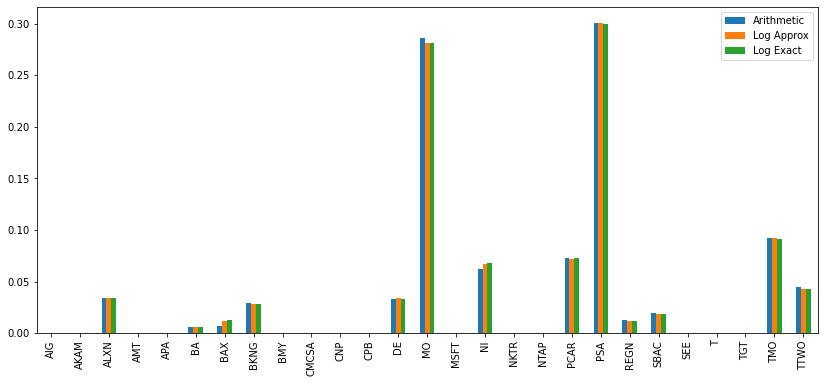

In [4]:
fig, ax = plt.subplots(figsize=(14,6))
w.plot(kind='bar', ax = ax)

In [5]:
returns = port.returns
cov = port.cov

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy()))
x = rp.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Risk Adjusted Return:")
print("Arithmetic", (y/x).item() * 12**0.5)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy()))
x = rp.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Approx", (y/x).item() * 12**0.5)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_3.to_numpy()))
x = rp.Sharpe_Risk(w_3, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Exact", (y/x).item() * 12**0.5)

Risk Adjusted Return:
Arithmetic 1.2779721503663568
Log Approx 1.2782383529101158
Log Exact 1.2782422049062345


### 2.2 Calculate efficient frontier

In [6]:
points = 40 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, kelly="exact", points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AIG,AKAM,ALXN,AMT,APA,BA,BAX,BKNG,BMY,CMCSA,...,NTAP,PCAR,PSA,REGN,SBAC,SEE,T,TGT,TMO,TTWO
0,0.0000%,0.0000%,0.5239%,0.0000%,0.9436%,0.0000%,6.3145%,0.0000%,8.6873%,4.2660%,...,0.0000%,0.1397%,21.9192%,0.7837%,0.0000%,0.0000%,8.9969%,2.7778%,1.2080%,1.8500%
1,0.0000%,0.0000%,2.8225%,0.0000%,0.0000%,0.0000%,3.8481%,1.8870%,4.5898%,0.0000%,...,0.0000%,5.4110%,27.6309%,0.8486%,0.2780%,0.0000%,1.7470%,1.0824%,7.0707%,3.0482%
2,0.0000%,0.0000%,3.3487%,0.0000%,0.0000%,0.3428%,2.2621%,2.6247%,1.6098%,0.0000%,...,0.0000%,7.0977%,29.6899%,0.9922%,1.4129%,0.0000%,0.0000%,0.0000%,8.9042%,3.8587%
3,0.0000%,0.0000%,3.1068%,0.0000%,0.0000%,0.1156%,0.0000%,3.4584%,0.0000%,0.0000%,...,0.0000%,7.4494%,30.1097%,1.7554%,2.9417%,0.0000%,0.0000%,0.0000%,8.5415%,5.7021%
4,0.0000%,0.0000%,2.4650%,0.0000%,0.0000%,0.0000%,0.0000%,4.3547%,0.0000%,0.0000%,...,0.0000%,7.4420%,29.3729%,2.7053%,4.4119%,0.0000%,0.0000%,0.0000%,6.9885%,7.5942%


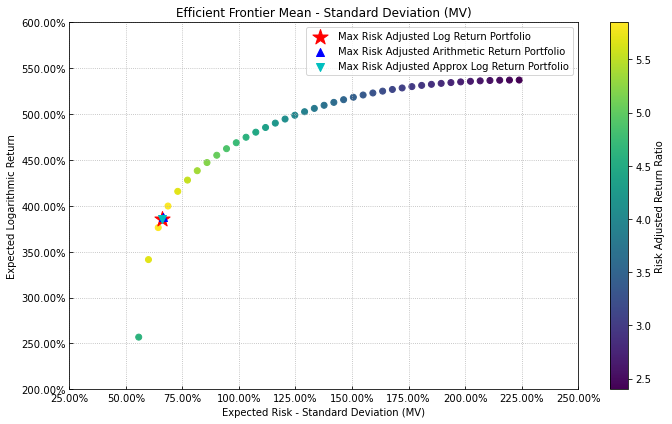

In [7]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Log Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

fig, ax = plt.subplots(figsize=(10,6))
rp.plot_frontier(w_frontier=frontier,
                 mu=mu,
                 cov=cov,
                 returns=returns,
                 rm=rm,
                 kelly=True,
                 rf=rf,
                 alpha=0.05,
                 cmap='viridis',
                 w=w_2,
                 label=label,
                 marker='*',
                 s=16,
                 c='r',
                 height=6,
                 width=10,
                 ax=ax)

y1 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy())) * 252 
x1 = rp.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05) * 252**0.5

y2 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy())) * 252 
x2 = rp.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05) * 252**0.5

ax.scatter(x=x1,
           y=y1,
           marker="^",
           s=8**2,
           c="b",
           label="Max Risk Adjusted Arithmetic Return Portfolio")
ax.scatter(x=x2,
           y=y2,
           marker="v",
           s=8**2,
           c="c",
           label="Max Risk Adjusted Approx Log Return Portfolio")
plt.legend()

## 2. Estimating Logarithmic Mean EVaR Portfolios

### 2.1 Calculating the portfolio that maximizes Risk Adjusted Return.

In [8]:
rm = 'EVaR' # Risk measure

w_1 = port.optimization(model=model, rm=rm, obj=obj, kelly=False, rf=rf, l=l, hist=hist)
w_2 = port.optimization(model=model, rm=rm, obj=obj, kelly='approx', rf=rf, l=l, hist=hist)
w_3 = port.optimization(model=model, rm=rm, obj=obj, kelly='exact', rf=rf, l=l, hist=hist)

w = pd.concat([w_1, w_2, w_3], axis=1)
w.columns = ['Arithmetic', 'Log Approx', 'Log Exact']

display(w)

,Arithmetic,Log Approx,Log Exact
AIG,0.0000%,0.0000%,0.0000%
AKAM,0.0000%,0.0000%,0.0000%
ALXN,18.5005%,13.4024%,13.9514%
AMT,0.0000%,0.0000%,0.0000%
APA,0.0000%,0.0000%,0.0000%
BA,0.0000%,0.0000%,0.0000%
BAX,0.0000%,0.8341%,0.8226%
BKNG,6.7424%,5.4842%,5.6157%
BMY,8.8990%,10.6478%,10.4870%
CMCSA,0.0000%,0.0000%,0.0000%


<AxesSubplot:>

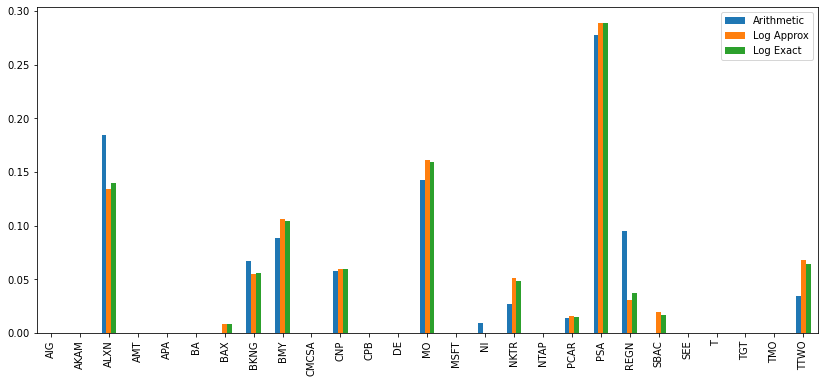

In [9]:
fig, ax = plt.subplots(figsize=(14,6))
w.plot(kind='bar', ax = ax)

In [10]:
returns = port.returns
cov = port.cov

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy()))
x = rp.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Risk Adjusted Return:")
print("Arithmetic", (y/x).item() * 12**0.5)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy()))
x = rp.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Approx", (y/x).item() * 12**0.5)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_3.to_numpy()))
x = rp.Sharpe_Risk(w_3, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Exact", (y/x).item() * 12**0.5)

Risk Adjusted Return:
Arithmetic 0.6679036894994221
Log Approx 0.6781640030718264
Log Exact 0.6782845917733381


### 3.2 Calculate efficient frontier

In [11]:
points = 40 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, kelly="exact", points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AIG,AKAM,ALXN,AMT,APA,BA,BAX,BKNG,BMY,CMCSA,...,NTAP,PCAR,PSA,REGN,SBAC,SEE,T,TGT,TMO,TTWO
0,0.0000%,0.4032%,3.7419%,0.0000%,0.0000%,0.0000%,3.0597%,5.0992%,20.3265%,0.0000%,...,0.0000%,0.0000%,24.0768%,0.0000%,5.4721%,0.0000%,0.1207%,0.0000%,1.7580%,7.1519%
1,0.0000%,0.0000%,12.7761%,0.0000%,0.0000%,0.0000%,0.9068%,5.0054%,13.2379%,0.0000%,...,0.0000%,0.8921%,28.7712%,1.3536%,2.9979%,0.0000%,0.0000%,0.0000%,0.0000%,7.3043%
2,0.0000%,0.0000%,14.0494%,0.0000%,0.0000%,0.0000%,0.7395%,5.7162%,9.9445%,0.0000%,...,0.0000%,1.6720%,28.8857%,4.1389%,1.5954%,0.0000%,0.0000%,0.0000%,0.0000%,6.3616%
3,0.0000%,0.0000%,14.1282%,0.0000%,0.0000%,0.0000%,0.0099%,6.2054%,7.1238%,0.0000%,...,0.0000%,2.6414%,28.8793%,5.8309%,1.2117%,0.0000%,0.0000%,0.0000%,0.0000%,6.1658%
4,0.0000%,0.0000%,13.7901%,0.0000%,0.0000%,0.0000%,0.0000%,6.7730%,4.2119%,0.0000%,...,0.0000%,3.9973%,28.7278%,7.0749%,1.0234%,0.0000%,0.0000%,0.0000%,0.0000%,6.2446%


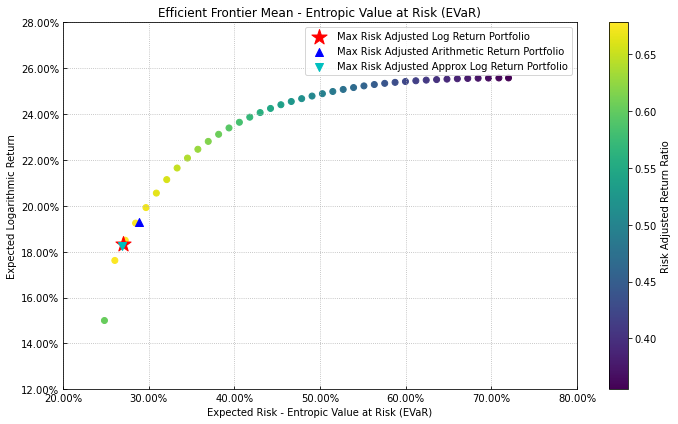

In [12]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Log Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

fig, ax = plt.subplots(figsize=(10,6))
rp.plot_frontier(w_frontier=frontier,
                 mu=mu,
                 cov=cov,
                 returns=returns,
                 rm=rm,
                 kelly=True,
                 rf=rf,
                 alpha=0.05,
                 cmap='viridis',
                 w=w_3,
                 label=label,
                 marker='*',
                 s=16,
                 c='r',
                 height=6,
                 width=10,
                 t_factor=12,
                 ax=ax)

y1 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy())) * 12
x1 = rp.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05) * 12**0.5

y2 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy())) * 12
x2 = rp.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05) * 12**0.5

ax.scatter(x=x1,
           y=y1,
           marker="^",
           s=8**2,
           c="b",
           label="Max Risk Adjusted Arithmetic Return Portfolio")
ax.scatter(x=x2,
           y=y2,
           marker="v",
           s=8**2,
           c="c",
           label="Max Risk Adjusted Approx Log Return Portfolio")
plt.legend()

## 3. Estimating Logarithmic Mean EDaR Portfolios

### 3.1 Calculating the portfolio that maximizes Risk Adjusted Return.

In [13]:
rm = 'EDaR' # Risk measure

w_1 = port.optimization(model=model, rm=rm, obj=obj, kelly=False, rf=rf, l=l, hist=hist)
w_2 = port.optimization(model=model, rm=rm, obj=obj, kelly='approx', rf=rf, l=l, hist=hist)
w_3 = port.optimization(model=model, rm=rm, obj=obj, kelly='exact', rf=rf, l=l, hist=hist)

w = pd.concat([w_1, w_2, w_3], axis=1)
w.columns = ['Arithmetic', 'Log Approx', 'Log Exact']

display(w)

,Arithmetic,Log Approx,Log Exact
AIG,0.0000%,0.0000%,0.0000%
AKAM,0.0000%,0.0001%,0.0000%
ALXN,0.0000%,4.2856%,3.0794%
AMT,2.8668%,0.1199%,0.2264%
APA,0.0000%,0.0004%,0.0000%
BA,0.0000%,0.0001%,0.0000%
BAX,0.0000%,0.0005%,0.0000%
BKNG,3.0492%,0.6699%,0.7675%
BMY,0.0000%,0.0007%,0.0000%
CMCSA,0.0000%,0.0003%,0.0000%


<AxesSubplot:>

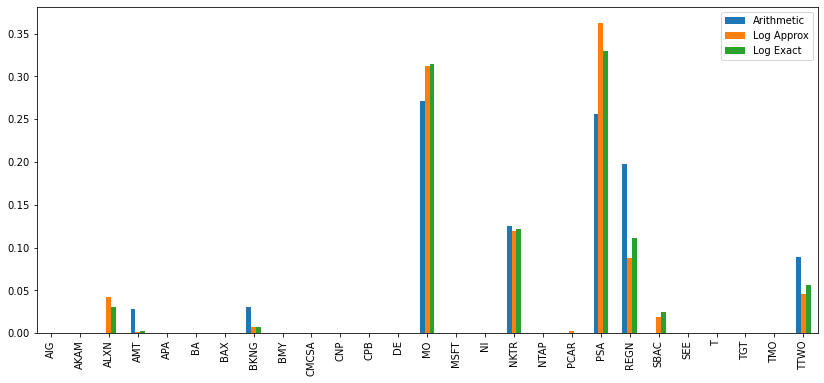

In [14]:
fig, ax = plt.subplots(figsize=(14,6))
w.plot(kind='bar', ax = ax)

In [15]:
returns = port.returns
cov = port.cov

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy()))
x = rp.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Risk Adjusted Return:")
print("Arithmetic", (y/x).item() * 12)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy()))
x = rp.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Approx", (y/x).item() * 12)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_3.to_numpy()))
x = rp.Sharpe_Risk(w_3, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Exact", (y/x).item() * 12)

Risk Adjusted Return:
Arithmetic 0.8286210312904556
Log Approx 0.845908076542069
Log Exact 0.8476438460164111


### 3.2 Calculate efficient frontier

In [16]:
points = 40 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, kelly="exact", points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AIG,AKAM,ALXN,AMT,APA,BA,BAX,BKNG,BMY,CMCSA,...,NTAP,PCAR,PSA,REGN,SBAC,SEE,T,TGT,TMO,TTWO
0,0.0000%,0.0000%,4.9565%,0.0000%,7.0823%,0.0000%,0.0000%,0.7697%,0.0000%,0.0000%,...,0.0000%,1.0093%,28.4278%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
1,0.0000%,0.0000%,9.1074%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,1.5056%,39.7868%,1.8749%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,3.6144%
2,0.0000%,0.0000%,5.2542%,0.8691%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.6369%,36.5720%,8.0964%,0.4944%,0.0000%,0.0000%,0.0000%,0.0000%,4.4518%
3,0.0000%,0.0000%,3.2274%,0.1985%,0.0000%,0.0000%,0.0000%,0.7230%,0.0000%,0.0000%,...,0.0000%,0.0000%,33.2193%,10.9570%,2.4613%,0.0000%,0.0000%,0.0000%,0.0000%,5.5825%
4,0.0000%,0.0000%,0.7696%,0.6775%,0.0000%,0.0000%,0.0000%,1.4798%,0.0000%,0.0000%,...,0.0000%,0.0000%,28.9516%,14.1448%,3.2891%,0.0000%,0.0000%,0.0000%,0.0000%,6.2024%


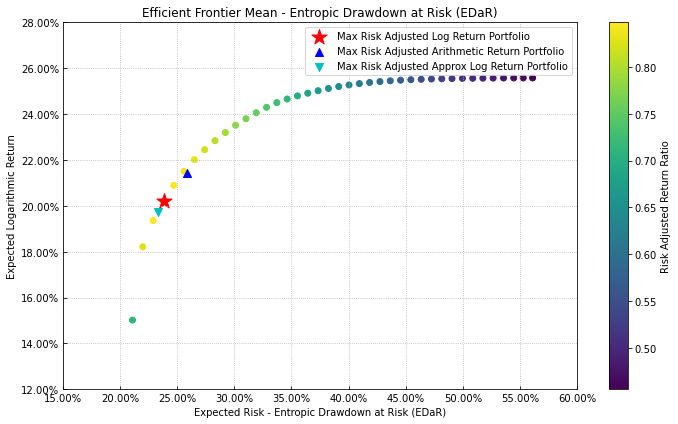

In [17]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Log Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

fig, ax = plt.subplots(figsize=(10,6))
rp.plot_frontier(w_frontier=frontier,
                 mu=mu,
                 cov=cov,
                 returns=returns,
                 rm=rm,
                 kelly=True,
                 rf=rf,
                 alpha=0.05,
                 cmap='viridis',
                 w=w_3,
                 label=label,
                 marker='*',
                 s=16,
                 c='r',
                 height=6,
                 width=10,
                 t_factor=12,
                 ax=ax)

y1 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy())) * 12
x1 = rp.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)

y2 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy())) * 12
x2 = rp.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)

ax.scatter(x=x1,
           y=y1,
           marker="^",
           s=8**2,
           c="b",
           label="Max Risk Adjusted Arithmetic Return Portfolio")
ax.scatter(x=x2,
           y=y2,
           marker="v",
           s=8**2,
           c="c",
           label="Max Risk Adjusted Approx Log Return Portfolio")
plt.legend()